<a href="https://colab.research.google.com/github/mohansivasai/Kannada-Mnist/blob/master/Kaggle_Kannada_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing the dependencies
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout,Dense,Add,Input,Flatten
from keras.models import Model

1.15.0


Using TensorFlow backend.


In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohansivasai12","key":"a40a45bcd4209e6ed9aec05fc5749c61"}'}

In [0]:
# file configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c Kannada-MNIST

 52% 5.00M/9.71M [00:00<00:00, 13.6MB/s]
100% 9.71M/9.71M [00:00<00:00, 24.5MB/s]
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 129MB/s]
  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 115MB/s]
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 27.8MB/s]


In [0]:
#unzipping the files
import zipfile
def zippy(path):
  local_zip = path
  zip_ref = zipfile.ZipFile(local_zip,'r')
  zip_ref.extractall('/content')
  zip_ref.close()

zippy('/content/train.csv.zip')
zippy('/content/test.csv.zip')
zippy('/content/Dig-MNIST.csv.zip')


In [0]:
ls

Dig-MNIST.csv      sample_data/           test.csv.zip
Dig-MNIST.csv.zip  sample_submission.csv  train.csv
kaggle.json        test.csv               train.csv.zip


In [0]:
#loading the training , validation, test datasets
def get_data(filename):
  with open(filename) as  file:
    csv_file = csv.reader(file,delimiter = ',')
    temp_images = []
    temp_labels = []
    first_line = True
    for row in csv_file:
      if first_line:
        first_line = False
      else:
        temp_labels.append(row[0])
        img_data = row[1:]
        img_data_arry = np.array_split(img_data,28)
        temp_images.append(img_data_arry)
    images = np.array(temp_images).astype('float')
    labels = np.array(temp_labels).astype('float')
  return images,labels

training_images,training_labels = get_data('train.csv')
test_images,test_labels   = get_data('test.csv')
val_images,val_labels = get_data('Dig-MNIST.csv')

In [0]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)
(5000,)
(10240, 28, 28)
(10240,)


In [0]:
print(val_labels[:20])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


1.0


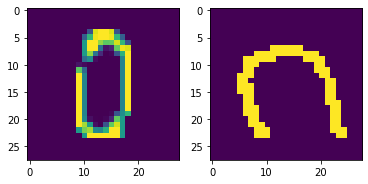

In [0]:
#ploting the data
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(training_images[10])
plt.subplot(1,2,2)
plt.imshow(val_images[11])
print(val_labels[11])

In [0]:
training_images = np.expand_dims(training_images,axis = 3)
test_images = np.expand_dims(test_images,axis = 3)
val_images = np.expand_dims(val_images,axis =3)
print(training_images.shape)
print(test_images.shape)
print(val_images.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)
(10240, 28, 28, 1)


In [0]:
#defining my own resnet -# having the error
def Resnet(input_shape = None,classes = None):
  X_input =  Input(input_shape)
  # Stage 1
  X = Conv2D(32, (3, 3), strides=(1, 1),padding = 'same', name='conv1')(X_input)
  X = BatchNormalization(axis=3, name='bn_conv1')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D(2,2)(X)
  # Stage 2
  X = Conv2D(64,(3,3),padding = 'same')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  #stage3
  X = Conv2D(128,(3,3),padding='same')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D(2,2)(X)
  #stage-4-Resnet block
  #X_input = Conv2D(32,(7,7))(X_input)
  #X_input = BatchNormalization(axis = 3)(X_input)
  #X_input = Activation('relu')(X)
  #X_input = Conv2D(64,(7,7))(X_input)
  #X_input = BatchNormalization(axis = 3)(X_input)
  #X_input = Activation('relu')(X_input)
  #X_input = Conv2D(128,(3,3))(X_input)
  #X_input = BatchNormalization(axis = 3)(X_input)
  #X = Add()([X,X_input])
  #X = Activation('relu')(X)
  #X = MaxPooling2D(2,2)(X)
  #output layer
  X = Flatten()(X)
  X = Dense(1024,activation = 'relu')(X)
  #X = Dense(2048,activation = 'relu')(X)
  #X = Dense(10,activation = 'softmax')(X)
  #model
  model = Model(X_input,X)
  return model


In [0]:
model = Resnet(input_shape=(28,28,1),classes = 10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



TypeError: ignored

In [0]:
#using the kaggle model defined by kenan ajkunic
model = tf.keras.models.Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [0]:
#compile the model
model.compile(optimizer = Adam(learning_rate=0.005),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [0]:
#Normalizing the values
training_images = training_images/255
test_images = test_images/255
val_images = val_images/255

In [0]:
#train/fit the model
hist = model.fit(training_images,training_labels,batch_size = 10,epochs = 10,verbose=1,validation_data=(val_images,val_labels))

Train on 60000 samples, validate on 10240 samples
Epoch 1/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.1403 - acc: 0.9597 - val_loss: 1.0104 - val_acc: 0.7445
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0650 - acc: 0.9821 - val_loss: 1.2535 - val_acc: 0.7154
Epoch 3/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0450 - acc: 0.9878 - val_loss: 1.0100 - val_acc: 0.7505
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0356 - acc: 0.9909 - val_loss: 0.8648 - val_acc: 0.7971
Epoch 5/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0311 - acc: 0.9920 - val_loss: 0.8419 - val_acc: 0.7983
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0247 - acc: 0.9933 - val_loss: 1.0977 - val_acc: 0.7721
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0218 - acc: 0.9943 - val_loss: 0.

Text(0.5, 1.0, 'Training loss Vs validation loss')

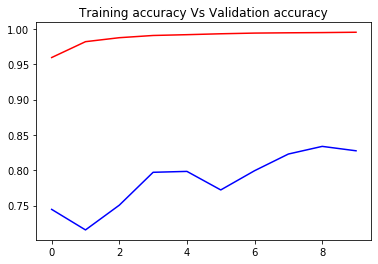

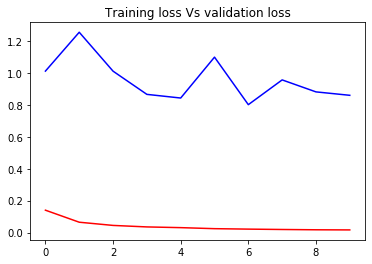

In [0]:
#plotting  Accuracy Vs Loss
acc= hist.history['acc']
loss = hist.history['loss']
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,acc,'r')
plt.plot(epochs,val_acc,'b')
plt.title("Training accuracy Vs Validation accuracy")
plt.figure()
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title('Training loss Vs validation loss')


In [0]:
eval  =  model.evaluate(val_images,val_labels)

10240/10240 [==============================] - 2s 172us/sample - loss: 0.8590 - acc: 0.8275


In [0]:
pred = model.predict(test_images)

In [0]:
test_label = pred.argmax(axis = -1)

In [0]:
test_label.shape

(5000,)

In [0]:
import pandas as pd
df = pd.read_csv('test.csv')

In [0]:
df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df['labels'] = test_label

In [0]:
df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [0]:
#Predicting on the test data 
data_df = df.drop(['id','labels'],axis = 1)

In [0]:
data_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
len(data_df.values[0])

784

In [0]:
image_data = np.array_split(data_df.values[4000],28)

4


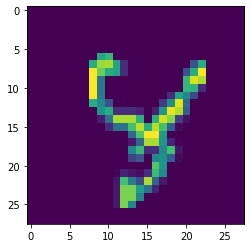

In [0]:
plt.imshow(image_data)
print(df['labels'][4000])